In [25]:
import pandas as pd
import os 
from pathlib import Path
import plotly.express as px

In [26]:
df = pd.read_excel("output/output.xlsx")
df.head()

,Unnamed: 0,avs_id,model,seed,timestamp,text,flesch_kincaid_grade,flesch_reading_ease,smog_index,coleman_liau_index,...,diff_difficult_words,diff_linsear_write_formula,diff_gunning_fog,diff_text_standard,diff_fernandez_huerta,diff_szigriszt_pazos,diff_gutierrez_polini,diff_crawford,diff_gulpease_index,diff_osman
0,0,0,unmodified,0,NaN,\nDepartment: ANESTHESIA PREOPERATIVE PROGRAM\...,10.8,51.89,13.3,14.10,...,0,0.0,0.0,Cannot compute,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,unmodified,0,NaN,Department: ANESTHESIA PREOPERATIVE PROGRAM\nD...,10.2,53.61,13.1,13.92,...,0,0.0,0.0,Cannot compute,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,unmodified,0,NaN,\nDepartment: ANESTHESIA PREOPERATIVE PROGRAM\...,10.5,52.80,13.0,13.98,...,0,0.0,0.0,Cannot compute,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,unmodified,0,NaN,Department: ANESTHESIA PREOPERATIVE PROGRAM\nD...,9.9,54.22,12.7,11.89,...,0,0.0,0.0,Cannot compute,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,unmodified,0,NaN,Department: ANESTHESIA PREOPERATIVE PROGRAM\nD...,10.7,52.09,13.5,14.16,...,0,0.0,0.0,Cannot compute,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
import plotly.io as pio

pio.templates.default = "plotly_white"
# pio.templates.default = "ggplot2"

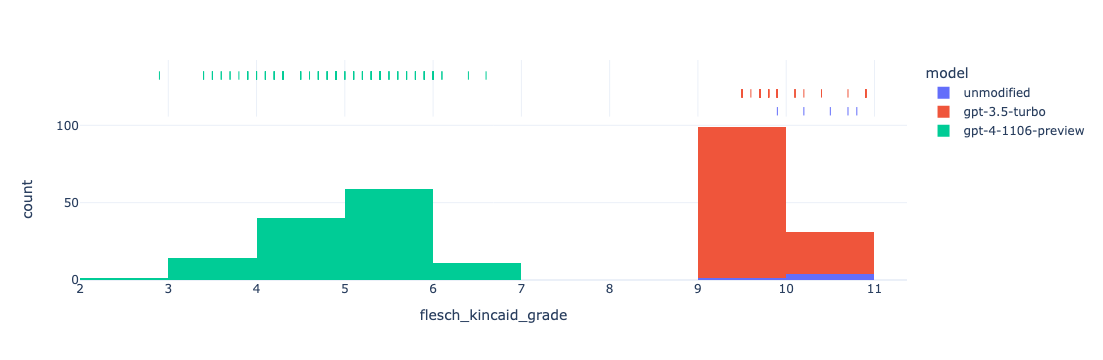

In [28]:
fig = px.histogram(df, x="flesch_kincaid_grade", color="model",
                   marginal="rug", # or violin, rug, box
                   hover_data=df.columns)
fig.show()

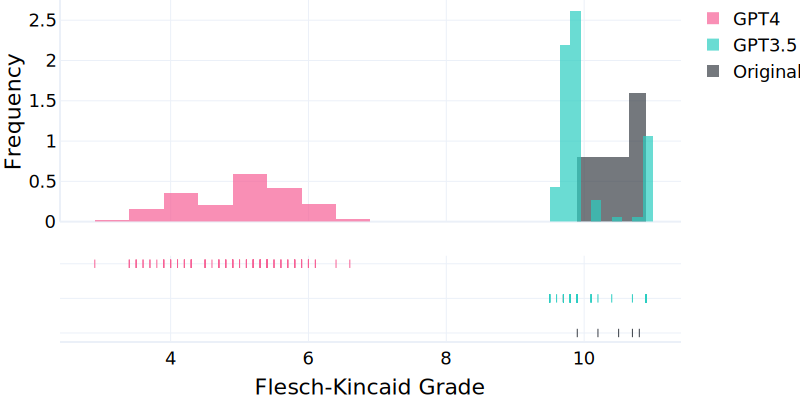

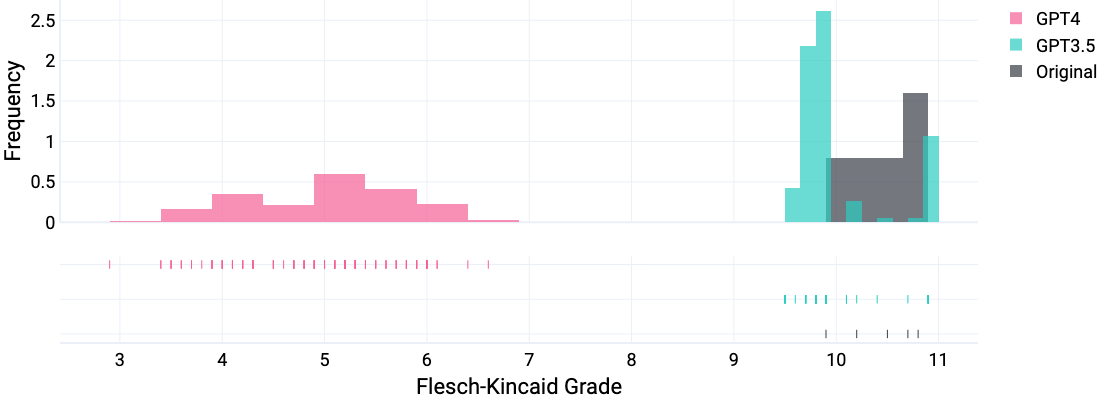

In [44]:
import plotly.figure_factory as ff
import numpy as np
import scipy

# Group data together
hist_data = [df.query("model == 'unmodified'").flesch_kincaid_grade,
  df.query("model == 'gpt-3.5-turbo'").flesch_kincaid_grade,
  df.query("model == 'gpt-4-1106-preview'").flesch_kincaid_grade]

group_labels = ['Original', 'GPT3.5', 'GPT4']
colors = ['#393E46', '#2BCDC1', '#F66095']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=[0.25, 0.15, 0.5], show_curve=False, colors=colors)

fig.update_layout(
    width=800,
    height=400,
    # legend_title="",
    # legend_x=-0.5,
    # legend_y=0,
    # showlegend=False,
    # legend_xanchor="left",
    # legend_yanchor="bottom",
    xaxis_title="Flesch-Kincaid Grade",
    yaxis_title="Frequency",
    font=dict(
        family="Roboto",
        size=18,
        color="Black"
    ),
    xaxis_showline=True,
    xaxis_gridwidth=1,
    xaxis_linewidth=2,
    yaxis_showline=True,
    yaxis_gridwidth=1,
    yaxis_linewidth=2,
    # title_font_size=24,
    # plot_bgcolor="white",
    margin_t=0,
    margin_b=0,
    margin_l=0,
    margin_r=0,
)

fig.write_image("output/fkg.png", scale=1)
fig.show(renderer="svg")
fig.show()


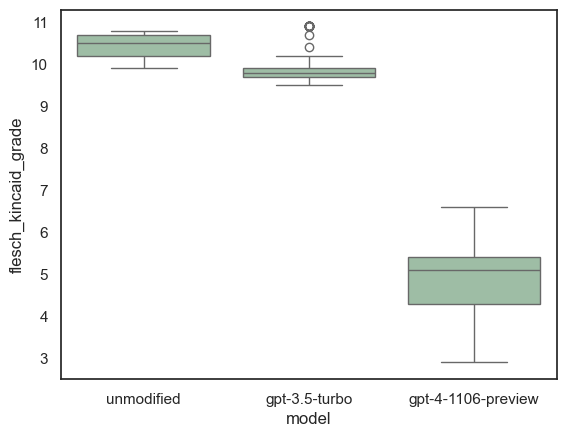

In [30]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", palette="pastel")
ax = sns.boxplot(x='model', y='flesch_kincaid_grade', data=df, color='#99c2a2')
plt.savefig("output/fkg_box.png")
plt.show()

/Users/alexandergoodell/.virtualenvs/aneslit/lib/python3.11/site-packages/seaborn/categorical.py:3398: UserWarning:

33.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/Users/alexandergoodell/.virtualenvs/aneslit/lib/python3.11/site-packages/seaborn/categorical.py:3398: UserWarning:

43.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



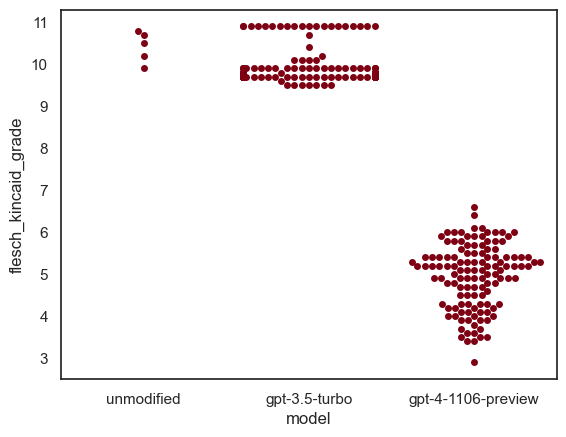

In [31]:
ax = sns.swarmplot(x="model", y="flesch_kincaid_grade", data=df, color='#7d0013')
plt.show()

In [33]:
# See https://www.reneshbedre.com/blog/anova.html

# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df, res_var='flesch_kincaid_grade', anova_model='flesch_kincaid_grade ~ C(model)')
res.anova_summary



,df,sum_sq,mean_sq,F,PR(>F)
C(model),2.0,1607.776078,803.888039,2097.794154,8.180335e-158
Residual,252.0,96.568000,0.383206,NaN,NaN


In [ ]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df, res_var='flesch_kincaid_grade', xfac_var='model', anova_model='flesch_kincaid_grade ~ C(model)')
res.tukey_summary

In [35]:
from scipy.stats import tukey_hsd

group0 = df.query("model == 'unmodified'")['flesch_kincaid_grade']
group1 = df.query("model == 'gpt-3.5-turbo'")['flesch_kincaid_grade']
group2 = df.query("model == 'gpt-4-1106-preview'")['flesch_kincaid_grade']

res = tukey_hsd(group0, group1, group2)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.452     0.247    -0.214     1.118
 (0 - 2)      5.456     0.000     4.790     6.122
 (1 - 0)     -0.452     0.247    -1.118     0.214
 (1 - 2)      5.004     0.000     4.819     5.189
 (2 - 0)     -5.456     0.000    -6.122    -4.790
 (2 - 1)     -5.004     0.000    -5.189    -4.819


### Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)

| Comparison          | Statistic  | p-value  | Lower CI  | Upper CI  |
|---------------------|------------|----------|-----------|-----------|
| (Original - GPT3.5) | 0.452      | 0.412    | -0.385    | 1.289     |
| (Original - GPT4)   | 5.399      | 0.000    | 4.562     | 6.236     |
| (GPT3.5 - Original) | -0.452     | 0.412    | -1.289    | 0.385     |
| (GPT3.5 - GPT4)        | 4.947      | 0.000    | 4.715     | 5.179     |
| (GPT4 - Original)      | -5.399     | 0.000    | -6.236    | -4.562    |
| (GPT4 - GPT3.5)        | -4.947     | 0.000    | -5.179    | -4.715    |



In [37]:
print('-'*30)

stats = df.groupby(['Class'])['Force'].agg(['mean', 'count', 'std'])
print(stats)
print('-'*30)

ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0    10.8
1    10.2
2    10.5
3     9.9
4    10.7
Name: flesch_kincaid_grade, dtype: float64>

flesch_kincaid_grade


basic descriptive stats
------------------------------



                      mean  count       std
model                                      
gpt-3.5-turbo        9.968    125  0.436925
gpt-4-1106-preview   4.964    125  0.763840
unmodified          10.420      5  0.370135
------------------------------
                      mean  count       std    ci95_hi    ci95_lo
model                                                            
gpt-3.5-turbo        9.968    125  0.436925  10.044596   9.891404
gpt-4-1106-preview   4.964    125  0.763840   5.097907   4.830093
unmodified          10.420      5  0.370135  10.744438  10.095562


tukey's HSD
------------------------------
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.452     0.247    -0.214     1.118
 (0 - 2)      5.456     0.000     4.790     6.122
 (1 - 0)     -0.452     0.247    -1.118     0.214
 (1 - 2)      5.004     0

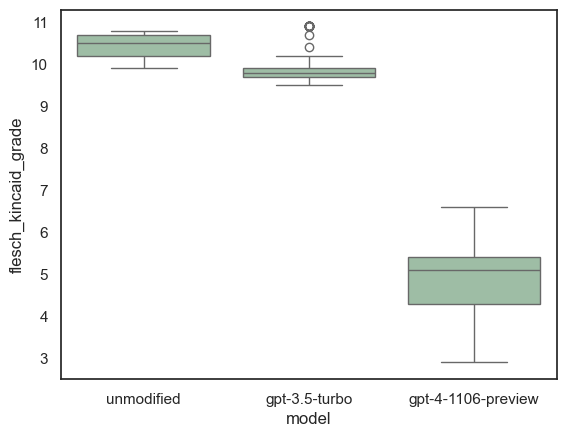

flesch_reading_ease


basic descriptive stats
------------------------------



                        mean  count       std
model                                        
gpt-3.5-turbo       54.10536    125  1.107118
gpt-4-1106-preview  85.00280    125  4.277976
unmodified          52.92200      5  0.991247
------------------------------
                        mean  count       std    ci95_hi    ci95_lo
model                                                              
gpt-3.5-turbo       54.10536    125  1.107118  54.299446  53.911274
gpt-4-1106-preview  85.00280    125  4.277976  85.752762  84.252838
unmodified          52.92200      5  0.991247  53.790866  52.053134


tukey's HSD
------------------------------
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.183     0.681    -4.519     2.152
 (0 - 2)    -32.081     0.000   -35.417   -28.745
 (1 - 0)      1.183     0.681    -2.152     4.519
 (1 - 

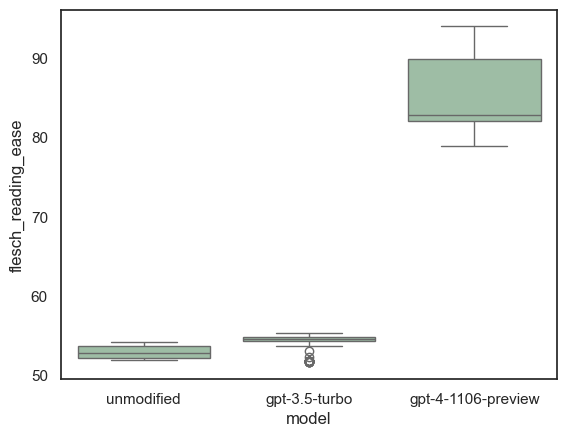

smog_index


basic descriptive stats
------------------------------



                       mean  count       std
model                                       
gpt-3.5-turbo       12.7928    125  0.254056
gpt-4-1106-preview   7.6656    125  0.555051
unmodified          13.1200      5  0.303315
------------------------------
                       mean  count       std    ci95_hi    ci95_lo
model                                                             
gpt-3.5-turbo       12.7928    125  0.254056  12.837338  12.748262
gpt-4-1106-preview   7.6656    125  0.555051   7.762905   7.568295
unmodified          13.1200      5  0.303315  13.385867  12.854133


tukey's HSD
------------------------------
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.327     0.219    -0.135     0.789
 (0 - 2)      5.454     0.000     4.992     5.917
 (1 - 0)     -0.327     0.219    -0.789     0.135
 (1 - 2)      5.127     0

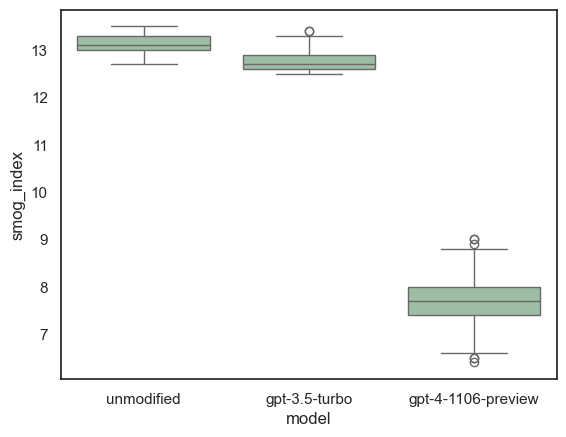

coleman_liau_index


basic descriptive stats
------------------------------



                        mean  count       std
model                                        
gpt-3.5-turbo       13.66688    125  0.838828
gpt-4-1106-preview   8.04656    125  0.701902
unmodified          13.61000      5  0.966178
------------------------------
                        mean  count       std    ci95_hi    ci95_lo
model                                                              
gpt-3.5-turbo       13.66688    125  0.838828  13.813933  13.519827
gpt-4-1106-preview   8.04656    125  0.701902   8.169609   7.923511
unmodified          13.61000      5  0.966178  14.456892  12.763108


tukey's HSD
------------------------------
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.057     0.986    -0.892     0.778
 (0 - 2)      5.563     0.000     4.728     6.399
 (1 - 0)      0.057     0.986    -0.778     0.892
 (1 - 2

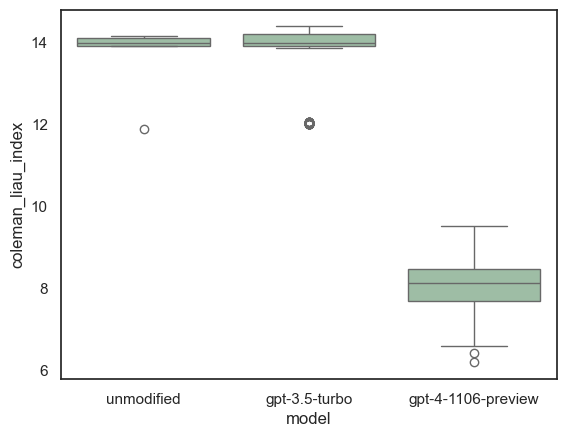

automated_readability_index


basic descriptive stats
------------------------------



                       mean  count       std
model                                       
gpt-3.5-turbo       13.9000    125  1.105631
gpt-4-1106-preview   8.6008    125  0.894923
unmodified          14.2800      5  1.263725
------------------------------
                       mean  count       std    ci95_hi    ci95_lo
model                                                             
gpt-3.5-turbo       13.9000    125  1.105631  14.093826  13.706174
gpt-4-1106-preview   8.6008    125  0.894923   8.757687   8.443913
unmodified          14.2800      5  1.263725  15.387703  13.172297


tukey's HSD
------------------------------
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.380     0.688    -0.706     1.466
 (0 - 2)      5.679     0.000     4.593     6.766
 (1 - 0)     -0.380     0.688    -1.466     0.706
 (1 - 2)

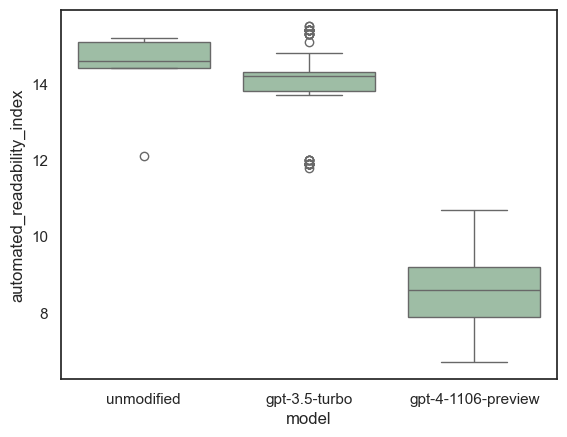

dale_chall_readability_score


basic descriptive stats
------------------------------



                       mean  count       std
model                                       
gpt-3.5-turbo       8.89192    125  0.395767
gpt-4-1106-preview  7.59352    125  0.289689
unmodified          8.94400      5  0.458017
------------------------------
                       mean  count       std   ci95_hi   ci95_lo
model                                                           
gpt-3.5-turbo       8.89192    125  0.395767  8.961301  8.822539
gpt-4-1106-preview  7.59352    125  0.289689  7.644305  7.542735
unmodified          8.94400      5  0.458017  9.345470  8.542530


tukey's HSD
------------------------------
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.052     0.943    -0.323     0.427
 (0 - 2)      1.350     0.000     0.975     1.726
 (1 - 0)     -0.052     0.943    -0.427     0.323
 (1 - 2)      1.2

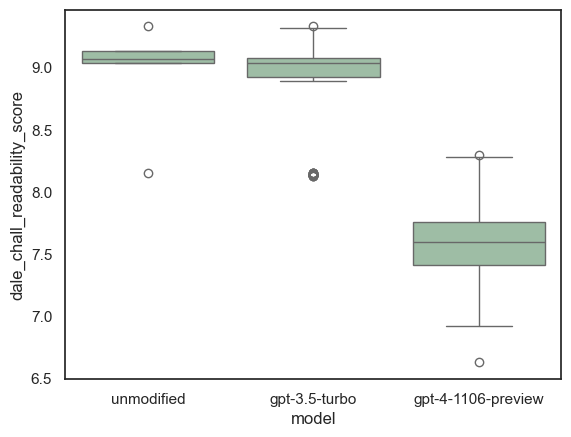

difficult_words


basic descriptive stats
------------------------------



                       mean  count        std
model                                        
gpt-3.5-turbo       101.360    125  29.711896
gpt-4-1106-preview   36.144    125   6.901033
unmodified          101.600      5  32.867917
------------------------------
                       mean  count        std     ci95_hi    ci95_lo
model                                                               
gpt-3.5-turbo       101.360    125  29.711896  106.568725  96.151275
gpt-4-1106-preview   36.144    125   6.901033   37.353804  34.934196
unmodified          101.600      5  32.867917  130.410000  72.790000


tukey's HSD
------------------------------
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.240     1.000   -23.194    23.674
 (0 - 2)     65.456     0.000    42.022    88.890
 (1 - 0)     -0.240     1.000   -23.674    23.194
 (1 -

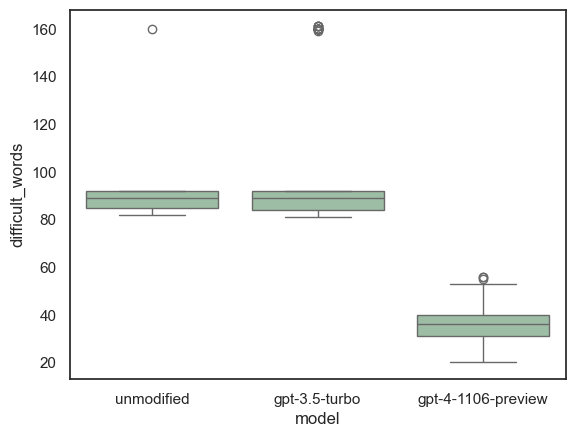

linsear_write_formula


basic descriptive stats
------------------------------



                         mean  count       std
model                                         
gpt-3.5-turbo       11.698667    125  1.171618
gpt-4-1106-preview  10.432775    125  2.205288
unmodified          12.473333      5  0.757335
------------------------------
                         mean  count       std    ci95_hi    ci95_lo
model                                                               
gpt-3.5-turbo       11.698667    125  1.171618  11.904060  11.493273
gpt-4-1106-preview  10.432775    125  2.205288  10.819379  10.046171
unmodified          12.473333      5  0.757335  13.137166  11.809500


tukey's HSD
------------------------------
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.775     0.598    -1.112     2.661
 (0 - 2)      2.041     0.030     0.154     3.927
 (1 - 0)     -0.775     0.598    -2.661     

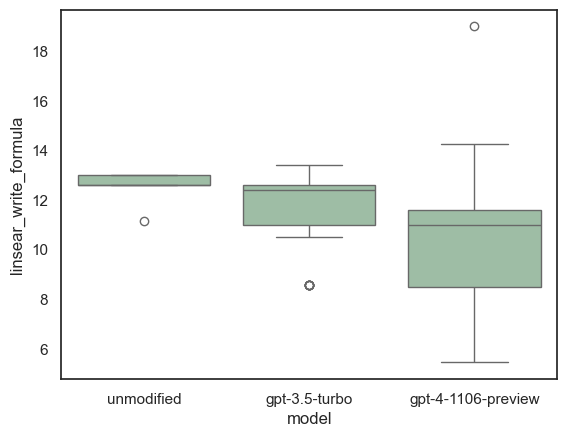

gunning_fog


basic descriptive stats
------------------------------



                        mean  count       std
model                                        
gpt-3.5-turbo       10.44928    125  0.522048
gpt-4-1106-preview   6.73832    125  0.568708
unmodified          10.90200      5  0.621184
------------------------------
                        mean  count       std    ci95_hi    ci95_lo
model                                                              
gpt-3.5-turbo       10.44928    125  0.522048  10.540799  10.357761
gpt-4-1106-preview   6.73832    125  0.568708   6.838019   6.638621
unmodified          10.90200      5  0.621184  11.446492  10.357508


tukey's HSD
------------------------------
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.453     0.167    -0.136     1.041
 (0 - 2)      4.164     0.000     3.575     4.752
 (1 - 0)     -0.453     0.167    -1.041     0.136
 (1 - 2)      

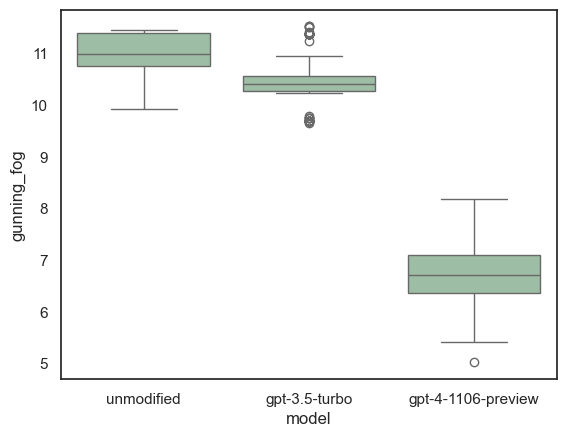

text_standard


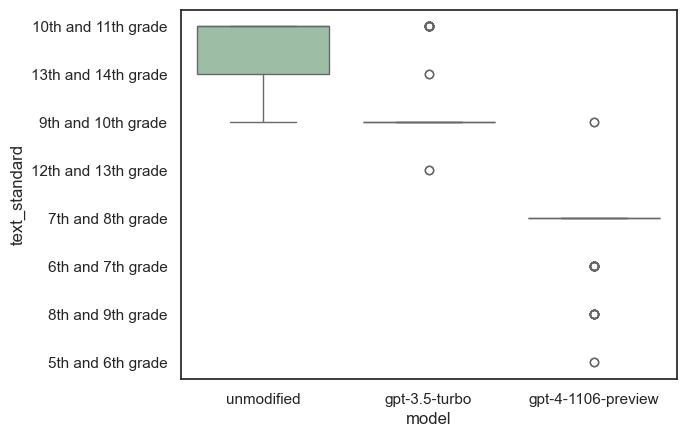

fernandez_huerta


basic descriptive stats
------------------------------



                         mean  count       std
model                                         
gpt-3.5-turbo        93.38472    125  1.111094
gpt-4-1106-preview  116.12800    125  3.192405
unmodified           92.19400      5  0.998864
------------------------------
                         mean  count       std     ci95_hi     ci95_lo
model                                                                 
gpt-3.5-turbo        93.38472    125  1.111094   93.579503   93.189937
gpt-4-1106-preview  116.12800    125  3.192405  116.687653  115.568347
unmodified           92.19400      5  0.998864   93.069543   91.318457


tukey's HSD
------------------------------
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.191     0.515    -3.744     1.362
 (0 - 2)    -23.934     0.000   -26.487   -21.381
 (1 - 0)      1.191     0.515    -1.362

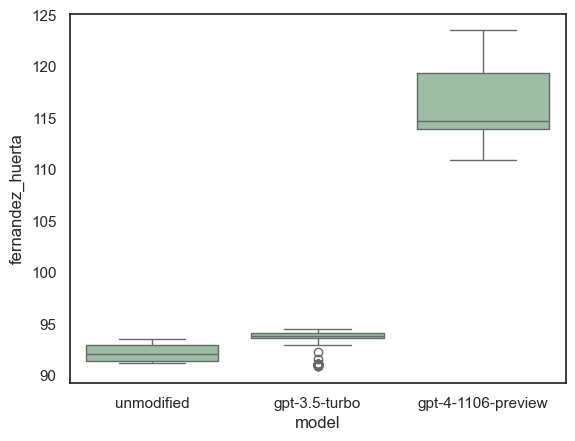

szigriszt_pazos


basic descriptive stats
------------------------------



                         mean  count       std
model                                         
gpt-3.5-turbo        90.04600    125  1.655640
gpt-4-1106-preview  113.71752    125  2.389298
unmodified           89.00000      5  2.107048
------------------------------
                         mean  count       std     ci95_hi     ci95_lo
model                                                                 
gpt-3.5-turbo        90.04600    125  1.655640   90.336247   89.755753
gpt-4-1106-preview  113.71752    125  2.389298  114.136382  113.298658
unmodified           89.00000      5  2.107048   90.846909   87.153091


tukey's HSD
------------------------------
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.046     0.505    -3.257     1.165
 (0 - 2)    -24.718     0.000   -26.929   -22.506
 (1 - 0)      1.046     0.505    -1.165 

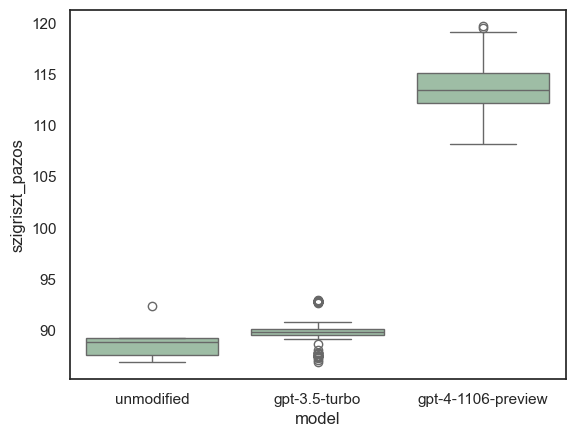

gutierrez_polini


basic descriptive stats
------------------------------



                        mean  count       std
model                                        
gpt-3.5-turbo       37.04640    125  1.512085
gpt-4-1106-preview  46.82184    125  1.213447
unmodified          36.97600      5  1.699126
------------------------------
                        mean  count       std    ci95_hi    ci95_lo
model                                                              
gpt-3.5-turbo       37.04640    125  1.512085  37.311480  36.781320
gpt-4-1106-preview  46.82184    125  1.213447  47.034567  46.609113
unmodified          36.97600      5  1.699126  38.465350  35.486650


tukey's HSD
------------------------------
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.070     0.993    -1.551     1.410
 (0 - 2)     -9.846     0.000   -11.326    -8.365
 (1 - 0)      0.070     0.993    -1.410     1.551
 (1 - 2) 

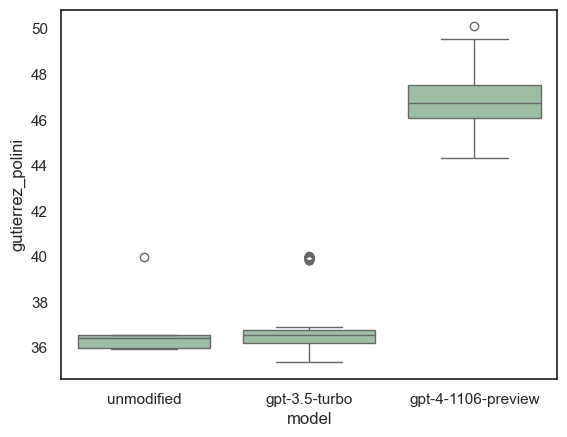

crawford


basic descriptive stats
------------------------------



                      mean  count       std
model                                      
gpt-3.5-turbo       3.2240    125  0.131615
gpt-4-1106-preview  1.3464    125  0.209663
unmodified          3.3200      5  0.148324
------------------------------
                      mean  count       std   ci95_hi   ci95_lo
model                                                          
gpt-3.5-turbo       3.2240    125  0.131615  3.247073  3.200927
gpt-4-1106-preview  1.3464    125  0.209663  1.383156  1.309644
unmodified          3.3200      5  0.148324  3.450012  3.189988


tukey's HSD
------------------------------
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.096     0.451    -0.092     0.284
 (0 - 2)      1.974     0.000     1.786     2.161
 (1 - 0)     -0.096     0.451    -0.284     0.092
 (1 - 2)      1.878     0.000     1.826     1.9

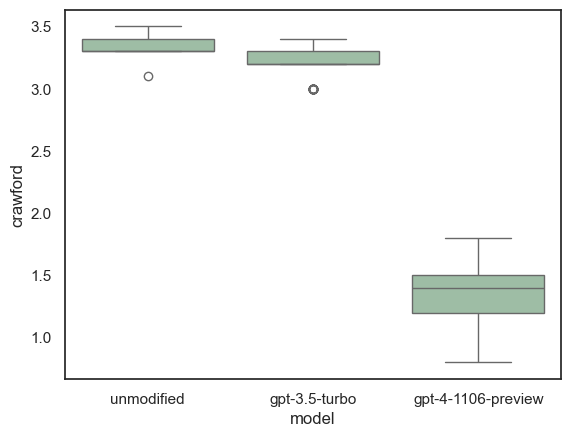

gulpease_index


basic descriptive stats
------------------------------



                       mean  count       std
model                                       
gpt-3.5-turbo       49.7368    125  2.295105
gpt-4-1106-preview  61.5272    125  2.318939
unmodified          49.1200      5  2.577208
------------------------------
                       mean  count       std    ci95_hi    ci95_lo
model                                                             
gpt-3.5-turbo       49.7368    125  2.295105  50.139150  49.334450
gpt-4-1106-preview  61.5272    125  2.318939  61.933728  61.120672
unmodified          49.1200      5  2.577208  51.379022  46.860978


tukey's HSD
------------------------------
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.617     0.828    -3.102     1.869
 (0 - 2)    -12.407     0.000   -14.893    -9.922
 (1 - 0)      0.617     0.828    -1.869     3.102
 (1 - 2)    -11.790  

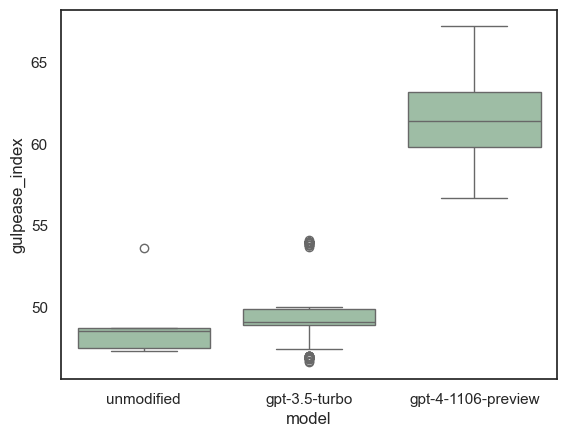

osman


basic descriptive stats
------------------------------



                        mean  count       std
model                                        
gpt-3.5-turbo       39.65448    125  4.988408
gpt-4-1106-preview  67.71648    125  3.773853
unmodified          39.47800      5  5.598577
------------------------------
                        mean  count       std    ci95_hi    ci95_lo
model                                                              
gpt-3.5-turbo       39.65448    125  4.988408  40.528986  38.779974
gpt-4-1106-preview  67.71648    125  3.773853  68.378066  67.054894
unmodified          39.47800      5  5.598577  44.385370  34.570630


tukey's HSD
------------------------------
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.176     0.996    -4.955     4.602
 (0 - 2)    -28.238     0.000   -33.017   -23.460
 (1 - 0)      0.176     0.996    -4.602     4.955
 (1 - 2)    -28.062 

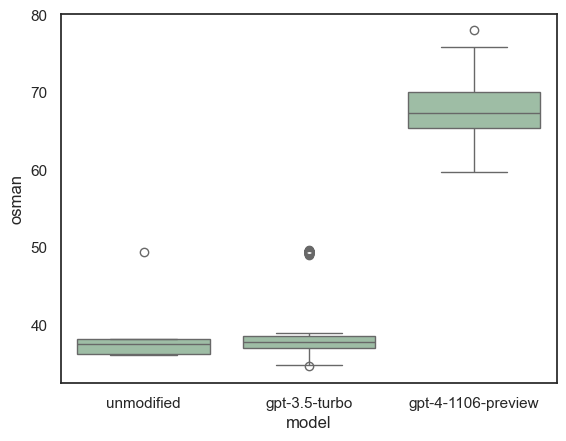

In [43]:
import math


measures = ['flesch_kincaid_grade','flesch_reading_ease','smog_index','coleman_liau_index','automated_readability_index','dale_chall_readability_score','difficult_words','linsear_write_formula','gunning_fog','text_standard','fernandez_huerta','szigriszt_pazos','gutierrez_polini','crawford','gulpease_index','osman' ]


for measure in measures:
    
    print(measure)
    print("================================ \n\n")
    
     # if continuous
    if measure != 'text_standard':
        ## mean
        print("basic descriptive stats")
        print('-'*30)
        print('\n\n')  
        
        stats = df.groupby(['model'])[measure].agg(['mean', 'count', 'std'])
        print(stats)
        print('-'*30)
        
        ci95_hi = []
        ci95_lo = []
        
        for i in stats.index:
            m, c, s = stats.loc[i]
            ci95_hi.append(m + 1.96*s/math.sqrt(c))
            ci95_lo.append(m - 1.96*s/math.sqrt(c))
        
        stats['ci95_hi'] = ci95_hi
        stats['ci95_lo'] = ci95_lo
        print(stats)
        
        print("\n\ntukey's HSD")
        print('-'*30)
        
        group0 = df.query("model == 'unmodified'")[measure]
        group1 = df.query("model == 'gpt-3.5-turbo'")[measure]
        group2 = df.query("model == 'gpt-4-1106-preview'")[measure]
        res = tukey_hsd(group0, group1, group2)
        print(res)
    
    ax = sns.boxplot(x='model', y=measure, data=df, color='#99c2a2')
    plt.savefig("output/" + measure + "-box-plot.png")
    plt.show()